In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-linear-multiple-regression/Marketing_Data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/kaggle/input/marketing-linear-multiple-regression/Marketing_Data.csv")

In [4]:
data.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [5]:
data.shape

(171, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


<Axes: xlabel='youtube', ylabel='sales'>

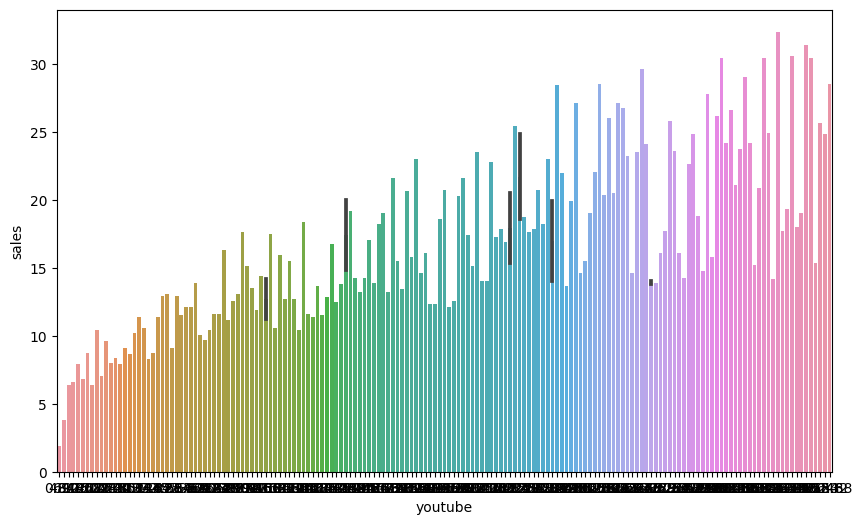

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'youtube', y = 'sales', data = data)

<Axes: xlabel='facebook', ylabel='sales'>

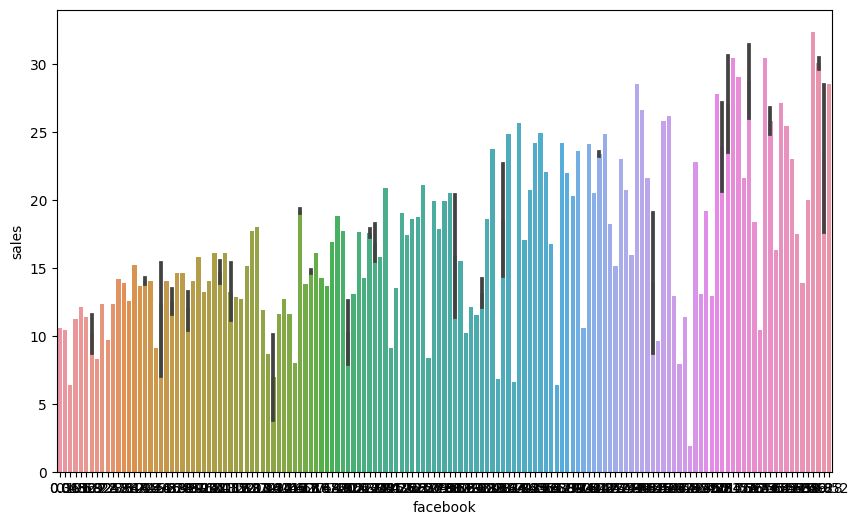

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'facebook', y = 'sales', data = data)

<Axes: xlabel='newspaper', ylabel='sales'>

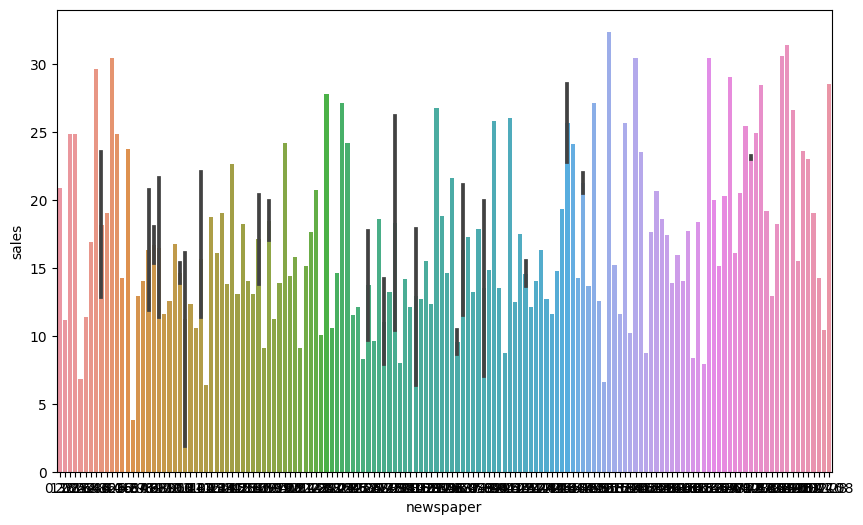

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'newspaper', y = 'sales', data = data)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [17]:
column_avg = data[['youtube','facebook','newspaper','sales']].mean()
print(column_avg)

youtube      178.021053
facebook      27.671579
newspaper     35.240000
sales         16.922807
dtype: float64


In [27]:
max_column = data[['youtube','facebook','newspaper','sales']].max()
print(max_column)

youtube      355.68
facebook      59.52
newspaper    121.08
sales         32.40
dtype: float64


In [28]:
print(data.loc[data['youtube'] == max_column['youtube'],['youtube', 'facebook','newspaper','sales']])
print(data.loc[data['facebook'] == max_column['facebook'],['youtube', 'facebook','newspaper','sales']])
print(data.loc[data['newspaper'] == max_column['newspaper'],['youtube', 'facebook','newspaper','sales']])
print(data.loc[data['sales'] == max_column['sales'],['youtube', 'facebook','newspaper','sales']])

    youtube  facebook  newspaper  sales
72   355.68     43.56     121.08  28.56
    youtube  facebook  newspaper  sales
29   252.96     59.52      45.24  28.56
    youtube  facebook  newspaper  sales
72   355.68     43.56     121.08  28.56
     youtube  facebook  newspaper  sales
146   332.28     58.68      50.16   32.4


In [29]:
X = data.drop('sales',axis=1)
Y = data['sales']
X.head()

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36


In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f"R2 Score of Simple Linear Regression model:{r2_score(y_test, y_pred)}")

R2 Score of Simple Linear Regression model:0.8161217009579116


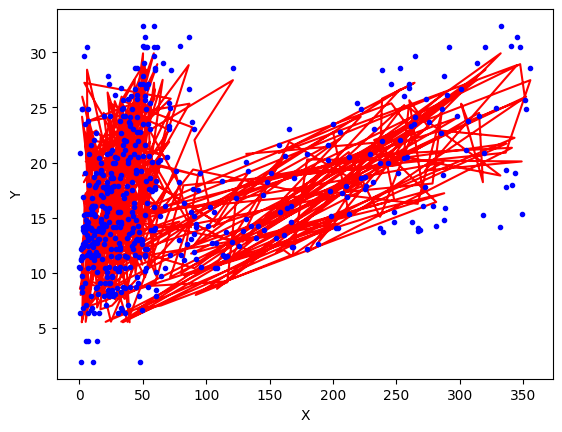

In [37]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [38]:
print(lr.coef_)
print(lr.intercept_)

[ 0.04382486  0.20047841 -0.00604255]
3.8923554927107844


Note1: From the Coefficient above, it is clear that Facebooks ads are most effective in increasing the sales, whereas newspaper ads actually results in loss. Hence more moeny can be spent on facebook ads which is being spent on newspaper ads otherwise.

Note2: From the graph above,we can see that we don't have  aperfect representation of data using the linear regression model. Therefore we can try to improve by using Polynomial regression instead

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9630095658858847


In [50]:
print(lr.coef_)
print(lr.intercept_)

[ 0.00000000e+00  5.00313992e-02  6.06250005e-03  5.96935270e-03
 -8.40998695e-05  8.88582458e-04 -3.66244156e-05  4.90995288e-04
 -3.75702534e-06  4.22567747e-05]
6.289554332831713


In [65]:
equation = f"{lr.intercept_:.2f}"
for i in range(1,len(lr.coef_)):
    if (lr.coef_[i]) > 0 or (lr.coef_[i]) < 0:
        equation += f" + ({lr.coef_[i]:.2f} * x^{i})"
print(equation) 

73.34 + (0.17 * x^1) + (-0.11 * x^2) + (0.15 * x^3) + (-0.00 * x^4) + (0.00 * x^5) + (-0.00 * x^6) + (0.00 * x^7) + (0.00 * x^8) + (-0.00 * x^9) + (0.00 * x^10) + (-0.00 * x^11) + (0.00 * x^12) + (-0.00 * x^13) + (-0.00 * x^14) + (0.00 * x^15) + (0.00 * x^16) + (-0.00 * x^17) + (-0.00 * x^18) + (-0.00 * x^19) + (-0.00 * x^20) + (-0.00 * x^21) + (-0.00 * x^22) + (0.00 * x^23) + (0.00 * x^24) + (-0.00 * x^25) + (-0.00 * x^26) + (-0.00 * x^27) + (-0.00 * x^28) + (-0.00 * x^29) + (-0.00 * x^30) + (-0.00 * x^31) + (0.00 * x^32) + (0.00 * x^33) + (0.00 * x^34) + (0.00 * x^35) + (0.00 * x^36) + (0.00 * x^37) + (0.00 * x^38) + (-0.00 * x^39) + (0.00 * x^40) + (-0.00 * x^41) + (0.00 * x^42) + (-0.00 * x^43) + (0.00 * x^44) + (0.00 * x^45) + (-0.00 * x^46) + (0.00 * x^47) + (-0.00 * x^48) + (0.00 * x^49) + (0.00 * x^50) + (0.00 * x^51) + (0.00 * x^52) + (-0.00 * x^53) + (0.00 * x^54) + (-0.00 * x^55)


In [66]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9720384744850088


In [67]:
print(lr.coef_)
print(lr.intercept_)

[ 0.00000000e+00  8.55723056e-02  1.15571929e-02  2.09998808e-02
 -3.24847955e-04  1.16899430e-03 -2.22305767e-04  2.17877555e-04
 -6.99741127e-04  4.07671667e-04  4.37948898e-07 -3.95849135e-07
  4.45905053e-07 -3.99298205e-06  2.10267097e-06 -5.66928317e-07
  1.12881852e-05 -1.16840434e-06  1.55864344e-07 -1.68365887e-06]
4.7731734524216165


In [68]:
equation = f"{lr.intercept_:.2f}"
for i in range(1,len(lr.coef_)):
    if (lr.coef_[i]) > 0 or (lr.coef_[i]) < 0:
        equation += f" + ({lr.coef_[i]:.2f} * x^{i})"
print(equation) 

4.77 + (0.09 * x^1) + (0.01 * x^2) + (0.02 * x^3) + (-0.00 * x^4) + (0.00 * x^5) + (-0.00 * x^6) + (0.00 * x^7) + (-0.00 * x^8) + (0.00 * x^9) + (0.00 * x^10) + (-0.00 * x^11) + (0.00 * x^12) + (-0.00 * x^13) + (0.00 * x^14) + (-0.00 * x^15) + (0.00 * x^16) + (-0.00 * x^17) + (0.00 * x^18) + (-0.00 * x^19)


In [69]:
poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9682812388717998


In [70]:
print(lr.coef_)
print(lr.intercept_)

[-2.32086112e-09  1.41783923e-01 -5.42653024e-02  5.29307713e-02
 -8.70870388e-04  1.05353512e-03 -6.22418157e-04  2.28947844e-03
  2.39942477e-03 -6.28284931e-04  2.46953769e-06  2.95248227e-06
  9.12379149e-07 -2.63071023e-05  1.25971364e-05  3.39016576e-07
  2.67850263e-05 -7.29579228e-05 -4.24253783e-05  1.73104438e-05
 -2.60504114e-09 -5.80537680e-09  1.18837914e-09  1.89799403e-08
 -4.11058732e-08  4.78014896e-09  1.46251501e-07  7.58570868e-08
 -2.79733174e-10 -1.09599055e-08 -3.49707105e-07  2.30776168e-07
  4.33049190e-07  1.47341706e-07 -1.02527380e-07]
3.403826412233686


In [71]:
equation = f"{lr.intercept_:.2f}"
for i in range(1,len(lr.coef_)):
    if (lr.coef_[i]) > 0 or (lr.coef_[i]) < 0:
        equation += f" + ({lr.coef_[i]:.2f} * x^{i})"
print(equation) 

3.40 + (0.14 * x^1) + (-0.05 * x^2) + (0.05 * x^3) + (-0.00 * x^4) + (0.00 * x^5) + (-0.00 * x^6) + (0.00 * x^7) + (0.00 * x^8) + (-0.00 * x^9) + (0.00 * x^10) + (0.00 * x^11) + (0.00 * x^12) + (-0.00 * x^13) + (0.00 * x^14) + (0.00 * x^15) + (0.00 * x^16) + (-0.00 * x^17) + (-0.00 * x^18) + (0.00 * x^19) + (-0.00 * x^20) + (-0.00 * x^21) + (0.00 * x^22) + (0.00 * x^23) + (-0.00 * x^24) + (0.00 * x^25) + (0.00 * x^26) + (0.00 * x^27) + (-0.00 * x^28) + (-0.00 * x^29) + (-0.00 * x^30) + (0.00 * x^31) + (0.00 * x^32) + (0.00 * x^33) + (-0.00 * x^34)


In [72]:
poly = PolynomialFeatures(degree=5, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8903912879275893


In [73]:
print(lr.coef_)
print(lr.intercept_)

[-7.07186465e+01  1.70128160e-01 -1.09604051e-01  1.48461376e-01
 -1.37465136e-03  2.71852586e-03 -2.44472224e-03  2.71890578e-03
  3.19171666e-03 -2.73563929e-03  7.04687704e-06 -7.43785741e-06
  1.04330274e-05 -6.36263837e-05 -9.08587370e-06  4.86604414e-05
  1.15154761e-04 -1.38699433e-04 -8.09459209e-06 -8.63503875e-06
 -1.88125483e-08 -1.10209250e-08 -3.46925595e-08  3.00292281e-07
  5.75491031e-07 -2.91221061e-07 -2.66687779e-07 -2.18473719e-07
 -6.82076418e-07 -1.06488496e-07 -2.92697603e-06 -5.46629468e-07
  6.77271885e-07  1.89813762e-07  8.82209271e-07  1.97059868e-11
  1.73012646e-11  5.49625345e-11  2.88838938e-10 -1.28066591e-09
  5.08718630e-10 -4.26960092e-09  9.11233851e-10 -8.18595998e-10
  5.30621005e-10  1.21871297e-08 -1.30412916e-08  2.35526001e-08
 -1.01199666e-08  2.60665272e-09  3.30433533e-08  2.35112494e-08
  2.05037334e-10 -3.45579705e-08  2.98371419e-08 -1.40927018e-08]
73.3388692319131


In [74]:
equation = f"{lr.intercept_:.2f}"
for i in range(1,len(lr.coef_)):
    if (lr.coef_[i]) > 0 or (lr.coef_[i]) < 0:
        equation += f" + ({lr.coef_[i]:.2f} * x^{i})"
print(equation) 

73.34 + (0.17 * x^1) + (-0.11 * x^2) + (0.15 * x^3) + (-0.00 * x^4) + (0.00 * x^5) + (-0.00 * x^6) + (0.00 * x^7) + (0.00 * x^8) + (-0.00 * x^9) + (0.00 * x^10) + (-0.00 * x^11) + (0.00 * x^12) + (-0.00 * x^13) + (-0.00 * x^14) + (0.00 * x^15) + (0.00 * x^16) + (-0.00 * x^17) + (-0.00 * x^18) + (-0.00 * x^19) + (-0.00 * x^20) + (-0.00 * x^21) + (-0.00 * x^22) + (0.00 * x^23) + (0.00 * x^24) + (-0.00 * x^25) + (-0.00 * x^26) + (-0.00 * x^27) + (-0.00 * x^28) + (-0.00 * x^29) + (-0.00 * x^30) + (-0.00 * x^31) + (0.00 * x^32) + (0.00 * x^33) + (0.00 * x^34) + (0.00 * x^35) + (0.00 * x^36) + (0.00 * x^37) + (0.00 * x^38) + (-0.00 * x^39) + (0.00 * x^40) + (-0.00 * x^41) + (0.00 * x^42) + (-0.00 * x^43) + (0.00 * x^44) + (0.00 * x^45) + (-0.00 * x^46) + (0.00 * x^47) + (-0.00 * x^48) + (0.00 * x^49) + (0.00 * x^50) + (0.00 * x^51) + (0.00 * x^52) + (-0.00 * x^53) + (0.00 * x^54) + (-0.00 * x^55)


We can observe that Polynomial Regression produces better result than Simple Linear Regression. Polynomial Regression with 3 degrees fits the best here and gives a R2 Score of 0.972. 